https://github.com/panicpotatoe/dataset

1.mỗi features có bao nhiêu missing values

2.đối với mỗi features thì sử dụng phương pháp gì (drop / impute, etc...)?

3.xác định outliers của từng features và xử lý outliers

4.so sánh tính chất của raw data và data đã được pre-processed (số lượng r/c, distribution, etc..)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/panicpotatoe/dataset/master/titatic_train.csv')
df_raw = df
len_df_raw = len(df_raw)
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
813,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,0,0,347082,31.275000,0,S
220,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.050000,0,S
160,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,0,371362,16.100000,0,S
268,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,29.0,0,0,PC 17582,29.381085,C125,S
180,0,3,"Sage, Miss. Constance Gladys",female,29.0,0,0,CA. 2343,30.656183,0,S
532,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,0,2690,7.229200,0,C
241,1,3,"Murphy, Miss. Katherine ""Kate""",female,29.0,1,0,367230,15.500000,0,Q
857,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.550000,E17,S
608,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,0,SC/Paris 2123,41.579200,0,C
92,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175000,E31,S


Câu 1

In [5]:

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ta thấy có 3 cột chứa missing value Age, Cabin, Embarked

cột PassengerId là Id định danh của hành khách nên có thể lượt bỏ

In [6]:

df.drop(columns=['PassengerId'], inplace=True)

Câu 2. Cách xử lý các missing value trên

Age: dùng phương pháp điền giá trị mean cho missing value ở cột Age

Cabin: điền giá trị 0 vào vị trí NA

Embarked: xoá nếu chứa NA

In [7]:
#Age
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(int(mean_age))
df['Age'] 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Vì đây là cột có giá trị null nhiều nhất, nếu xoá thì bộ dữ liệu train sẽ còn lại rất ít

Vì vậy tiến hành điền giá trị 0 cho những vị trí NA, với ý nghĩa là người dùng ko cung cấp thông tin vị trí cabin

In [8]:
#Cabin
df['Cabin'] = df['Cabin'].fillna(0)

In [9]:
#Embarked
df.dropna(subset=['Embarked'], inplace=True)

Bộ dữ liệu sau khi xử lý NA

In [10]:

df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Trước khi xử lý outliers

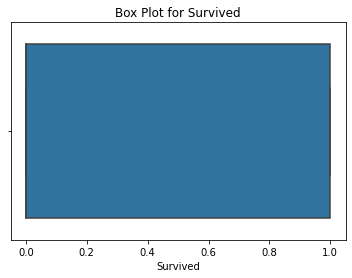

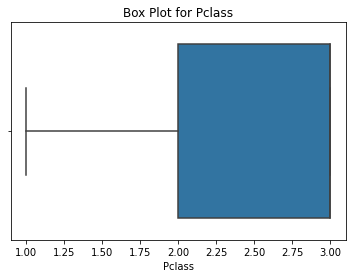

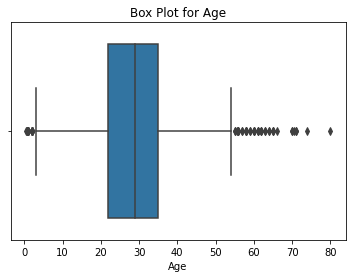

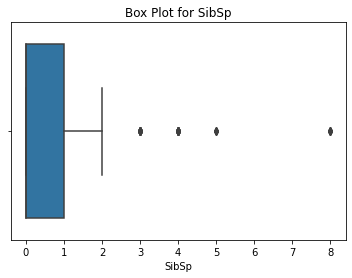

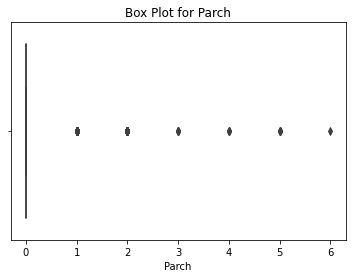

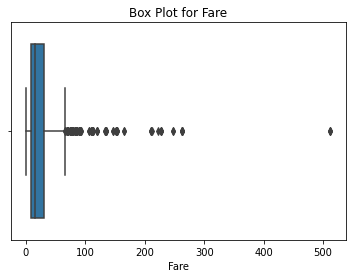

In [11]:

header = df.columns
for i in header:
    if is_numeric_dtype(df[i]):
        plt.figure()
        sns.boxplot(x=df[i])
        plt.title(f'Box Plot for {i}')
        plt.show()

Cau 3

In [12]:
header = df.columns

def check_outliers(val):
    k = 1.5
    Q1 = val.quantile(0.25)
    Q3 = val.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    res = val[(val < lower_bound) | (val > upper_bound)]
    return res

def handle_outliers(column_name, index):
    if(column_name == 'Age'):
        mean_age = int(df['Age'].mean())
        df.loc[index, "Age"] = mean_age
    if(column_name == 'SibSp'):
        mean_SibSp = int(df['SibSp'].mean())
        df.loc[index, "SibSp"] = mean_SibSp
    if(column_name == 'Parch'):
        mean_Parch = int(df['Parch'].mean())
        df.loc[index, "Parch"] = mean_Parch
    if(column_name == 'Fare'):
        mean_Fare = float(df['Fare'].mean())
        df.loc[index, "Fare"] = mean_Fare

def get_col_outliers(header):
    for i in header:
        if is_numeric_dtype(df[i]):
            list_outliers = check_outliers(df[i])
            
            if not list_outliers.empty:
                print(f"Column '{i}' Tồn Tại {len( list_outliers) } Giá trị ngoại lai")
            else:
                print(f'{i} Không tồn tại giá trị ngoại lai')

#Xử lý outliers
for i in header:
    if is_numeric_dtype(df[i]):
        list_outliers = check_outliers(df[i])
        
        if not list_outliers.empty:
            print(f"Column '{i}' Tồn Tại Giá trị ngoại lai")
            for index in list_outliers.index:
                handle_outliers(i, index)    
            print(f"Đã xử lý {len( list_outliers) } giá trị ngoại lai của cột {i}")
            print('--------------------')
            
        else:
            print(f'{i} Không tồn tại giá trị ngoại lai')
            print('--------------------')


Survived Không tồn tại giá trị ngoại lai
--------------------
Pclass Không tồn tại giá trị ngoại lai
--------------------
Column 'Age' Tồn Tại Giá trị ngoại lai
Đã xử lý 65 giá trị ngoại lai của cột Age
--------------------
Column 'SibSp' Tồn Tại Giá trị ngoại lai
Đã xử lý 46 giá trị ngoại lai của cột SibSp
--------------------
Column 'Parch' Tồn Tại Giá trị ngoại lai
Đã xử lý 213 giá trị ngoại lai của cột Parch
--------------------
Column 'Fare' Tồn Tại Giá trị ngoại lai
Đã xử lý 114 giá trị ngoại lai của cột Fare
--------------------


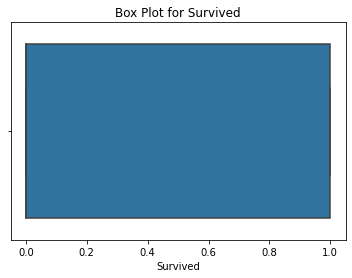

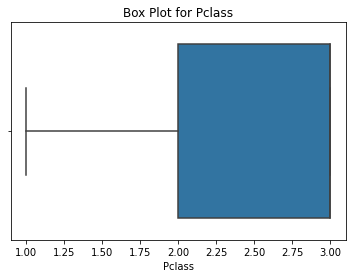

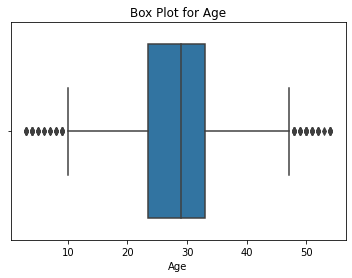

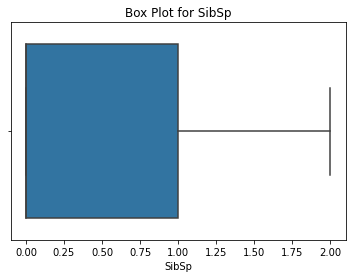

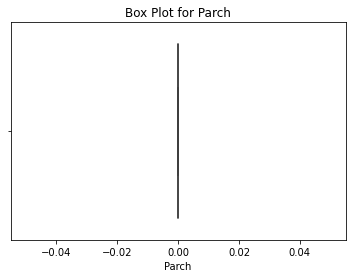

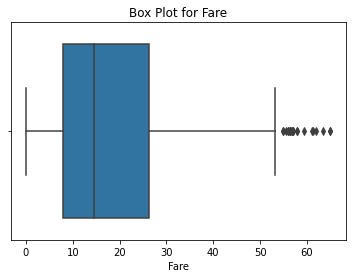

In [13]:
#sau khi xủ lý outliers
header = df.columns
for i in header:
    if is_numeric_dtype(df[i]):
        plt.figure()
        sns.boxplot(x=df[i])
        plt.title(f'Box Plot for {i}')
        plt.show()

cau 4

In [14]:
print(f'Kích thước tệp dữ liệu sau khi xử lý: {df.shape}\n')
print('Kiểm tra NA sau khi xử lý')
print(df.isna().sum())

len_df = len(df)

if(len_df > len_df_raw):
    print(f'Số lượng dòng tăng {len_df - len_df_raw} so với dữ liệu gốc')
elif(len_df < len_df_raw):
    print(f'Số lượng dòng giảm {len_df_raw - len_df} so với dữ liệu gốc')
else:
    print(f'Số lượng dòng không thay đổi')


Kích thước tệp dữ liệu sau khi xử lý: (889, 11)

Kiểm tra NA sau khi xử lý
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64
Số lượng dòng giảm 2 so với dữ liệu gốc
